In [1]:
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import shock_tube
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 100
p = 0

solver = EulerSolver(
    w0=shock_tube, nx=N, px=p, riemann_solver="llf", bc=BoundaryCondition(x="free")
)

In [3]:
solver.rkorder(0.245)

100%|██████████| 0.245/0.245 [00:00]               


t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.24, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.24, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.24, x=[0.01, 0.99], y=0.50, z=0.50


Text(0.5, 0, '$x$')

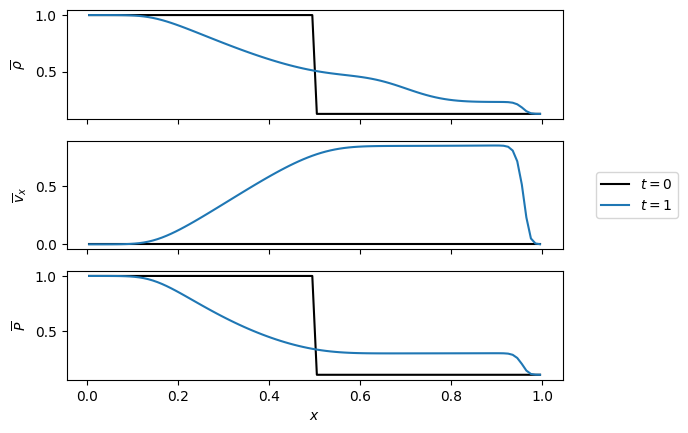

In [4]:
fig, ax = plt.subplots(3, sharex=True)

for i, (var, label) in enumerate(
    zip(
        ["rho", "vx", "P"],
        [r"$\overline{\rho}$", r"$\overline{v}_x$", r"$\overline{P}$"],
    )
):
    solver.plot_1d_slice(ax[i], t=0, color="k", param=var, y=0.5, z=0.5, label=r"$t=0$")
    solver.plot_1d_slice(ax[i], t=1, param=var, y=0.5, z=0.5, label=r"$t=1$")
    ax[i].set_ylabel(label)

ax[1].legend(loc="center", bbox_to_anchor=(1.15, 0.5))
ax[2].set_xlabel("$x$")

In [5]:
for n in [0, -1]:
    m_tot = np.sum(solver.snapshots[n]["fv"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {solver.snapshot_times[n]}: {m_tot}")

Total mass at time 0: 0.5625
Total mass at time 0.245: 0.5624998717907802
